In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the dataset and view it
data=pd.read_csv('/content/drug_side_effect_dataset.csv')

In [4]:
data.head()

,Name,Age,Gender,Race,Drug_Name,Side_Effect
0,Julie Cunningham,33.0,Male,Hispanic,evoclin,No Side Effects
1,Seth Frey,64.0,Male,Black,keflex,Moderate Side Effects
2,Timothy Thomas,24.0,Female,Black,elavil,Extremely Severe Side Effects
3,Evelyn Peters,54.0,Female,Asian,ciprofloxacin,Moderate Side Effects
4,Andre Richards,71.0,Male,Hispanic,avelox,No Side Effects


# Exploratory data analysis

In [5]:
# To find the shape of the dataset
data.shape

(400000, 6)

In [6]:
# To find basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Name         400000 non-null  object 
 1   Age          399794 non-null  float64
 2   Gender       399836 non-null  object 
 3   Race         399841 non-null  object 
 4   Drug_Name    400000 non-null  object 
 5   Side_Effect  400000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.3+ MB


**Analysis of Numerical feature**

In [7]:
##Selecting numerical features
numerical_data = data.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 1 numerical features: 

['Age']


In [8]:
# To find statistical summary
data.describe()

,Age
count,399794.000000
mean,48.973381
std,18.180260
min,18.000000
25%,33.000000
50%,49.000000
75%,65.000000
max,80.000000


Histogram

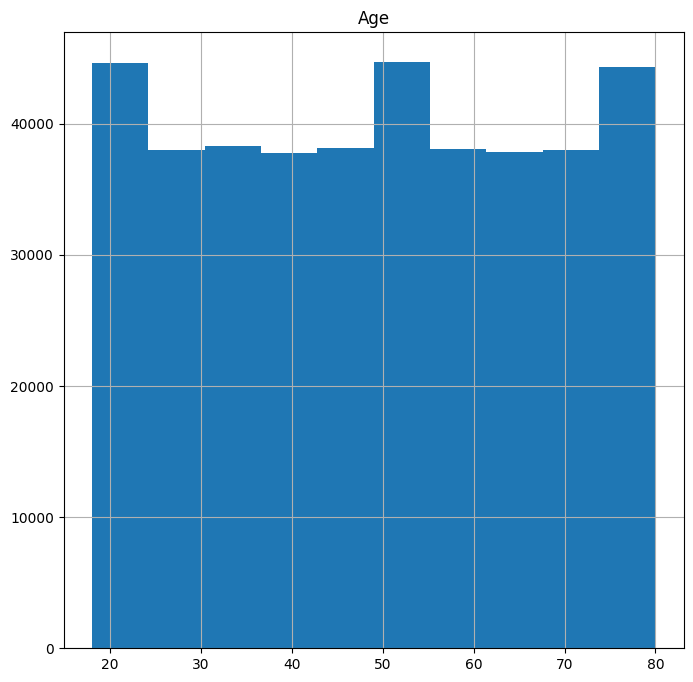

In [9]:
# To find distribution of numerical feature 'Age'
numerical_data.hist(figsize=(8,8))
plt.show()

Number Unique values in each feature

In [10]:
numerical_data.nunique()

Age    63
dtype: int64

**Observations**

1.There are only 63 unique values in 'Age' column.

2.The distribution of 'Age' column is close to normal.

**Analysis of categorical features**

In [11]:
#Selecting categoricalfeatures
categorical_data=data.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 5 categorical features: 

['Name', 'Gender', 'Race', 'Drug_Name', 'Side_Effect']


In [12]:
#Summary satistics of Categorical features
categorical_data.describe(include='object')

,Name,Gender,Race,Drug_Name,Side_Effect
count,400000,399836,399841,400000,400000
unique,192596,3,5,147,5
top,Michael Johnson,Male,Other,prednisone,Mild Side Effects
freq,144,133617,80355,5330,80261


Bar plots of value counts of each categorical features

(array([0, 1, 2]),
 [Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'Other')])

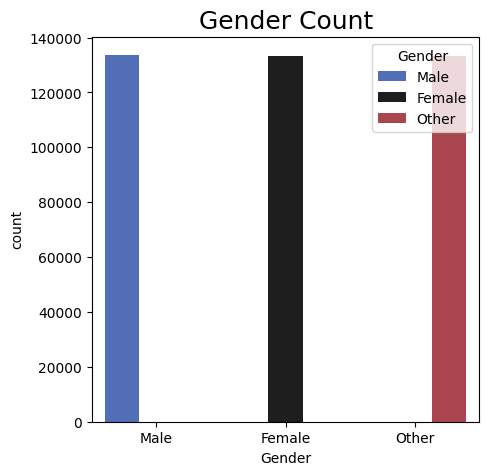

In [13]:
## Plotting a count plot on 'Gender'
data['Gender'].value_counts()
plt.figure(figsize=(5,5))
sns.countplot(x='Gender',data=data,palette="icefire",hue='Gender')
plt.title("Gender Count",fontsize=18)
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Hispanic'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'White'),
  Text(4, 0, 'Other')])

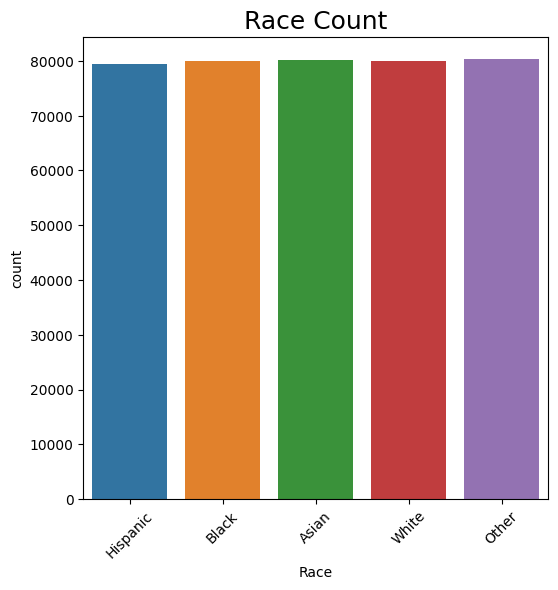

In [14]:
## Plotting a count plot on 'Race'
data["Race"].value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='Race',data=data)
plt.title("Race Count",fontsize=18 )
plt.xticks(rotation=45)

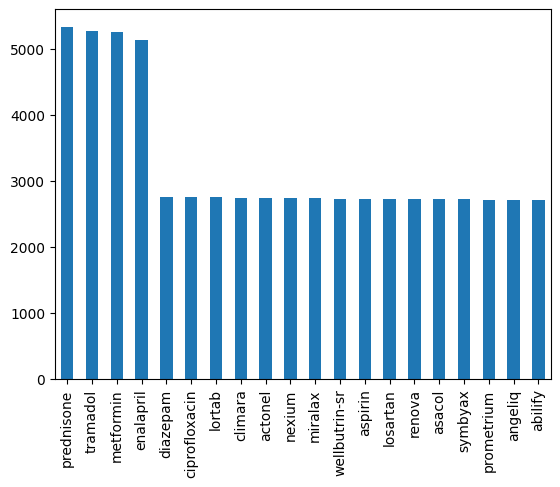

In [15]:
## Count plot of the top 20 drugs in the data
data['Drug_Name'].value_counts().head(20).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

In [16]:
data['Drug_Name'].value_counts().head(20)

prednisone       5330
tramadol         5268
metformin        5246
enalapril        5129
diazepam         2757
ciprofloxacin    2753
lortab           2746
climara          2744
actonel          2739
nexium           2739
miralax          2734
wellbutrin-sr    2727
aspirin          2726
losartan         2725
renova           2725
asacol           2721
symbyax          2721
prometrium       2713
angeliq          2712
abilify          2708
Name: Drug_Name, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'No Side Effects'),
  Text(1, 0, 'Moderate Side Effects'),
  Text(2, 0, 'Extremely Severe Side Effects'),
  Text(3, 0, 'Severe Side Effects'),
  Text(4, 0, 'Mild Side Effects')])

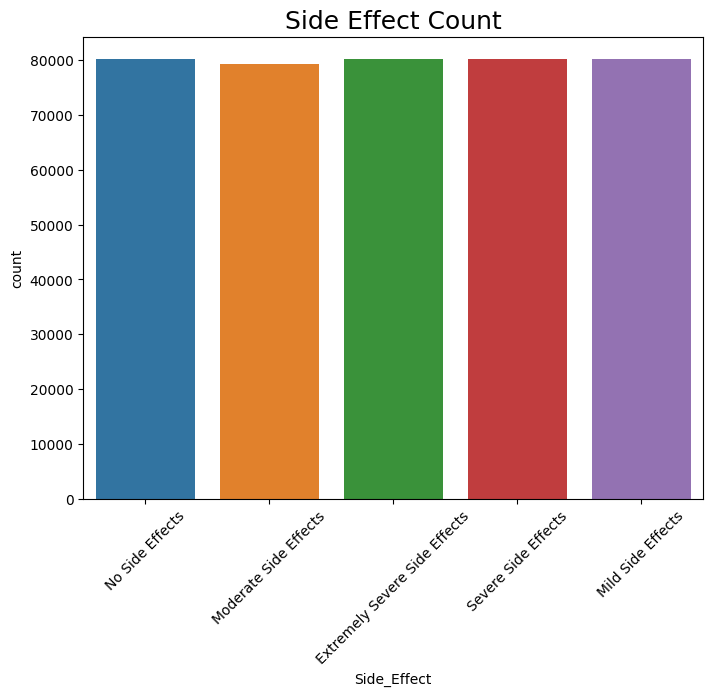

In [17]:
## Plotting a count plot on the 'SIDE EFFECTS'
data['Side_Effect'].value_counts()
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='Side_Effect')
plt.title('Side Effect Count',fontsize=18)
plt.xticks(rotation=45)

**Observations**

1.All categorical features except 'Name' contains large number of non unique values.

2.The top popular drug in the data is 'prednisone'.

3.The distribution of all categorical features are almost identical.

# Data Preprocessing

**To find missing values**

In [18]:
data.isna().sum()

Name             0
Age            206
Gender         164
Race           159
Drug_Name        0
Side_Effect      0
dtype: int64

To fill missing values in numerical column 'Age' We Initialize the SimpleImputer object with the 'median' strategy. The 'median' strategy will replace missing values with the median of the non-missing values in the "Age" column.

In [20]:
# Initialize the SimpleImputer with 'mean' strategy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [21]:
# Fit and transform to fill missing values
data['Age'] = imputer.fit_transform(data[['Age']])

To fill missing values in categorical columns 'Gender' and 'Race' We use mode.

In [31]:
# Calculate the mode of the Gender column
mode_value = data['Gender'].mode()[0]  # Using [0] to get the first mode (in case there are multiple)

# Fill missing values with the mode
data['Gender'].fillna(mode_value, inplace=True)

In [32]:
# Calculate the mode of the Race column
mode_value = data['Race'].mode()[0]  # Using [0] to get the first mode (in case there are multiple)

# Fill missing values with the mode
data['Race'].fillna(mode_value, inplace=True)

In [33]:
# Check the number of missing values after imputation
data.isnull().sum()


Name           0
Age            0
Gender         0
Race           0
Drug_Name      0
Side_Effect    0
dtype: int64

**Outlier detection**

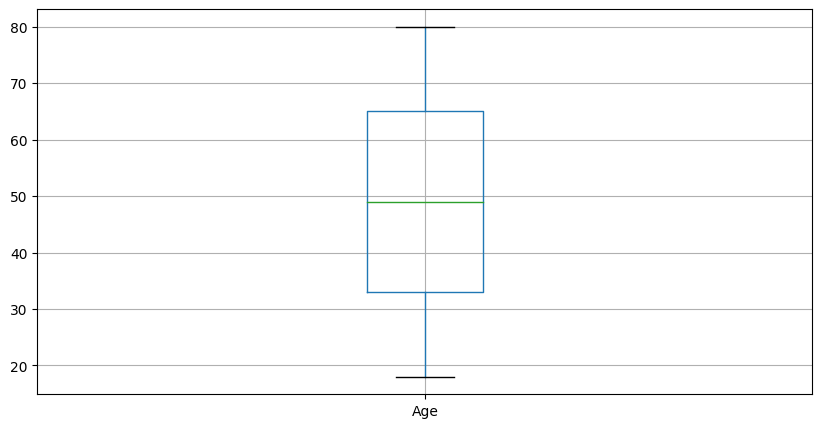

In [34]:
## Finding outliers
graph=data.select_dtypes(include=['float64'])
graph.boxplot(figsize=(10,5))
plt.show()

There are no outliers present in Numerical column.

In [35]:
## Dropping the  attribute ‘NAME’ as it doesn't give any contribution to the modeling.
data=data.drop(['Name'],axis=1)
data.head()

,Age,Gender,Race,Drug_Name,Side_Effect
0,33.0,Male,Hispanic,evoclin,No Side Effects
1,64.0,Male,Black,keflex,Moderate Side Effects
2,24.0,Female,Black,elavil,Extremely Severe Side Effects
3,54.0,Female,Asian,ciprofloxacin,Moderate Side Effects
4,71.0,Male,Hispanic,avelox,No Side Effects


**Encoding**

In [36]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
attr = []
for i in data.columns:
    if data[i].dtype == 'object':
        attr.append(i)

for i in attr:
    data[i] = le.fit_transform(data[i])

In [38]:
data.head()

,Age,Gender,Race,Drug_Name,Side_Effect
0,33.0,1,2,49,3
1,64.0,1,1,60,2
2,24.0,0,1,44,0
3,54.0,0,0,29,2
4,71.0,1,2,21,3


**Correlation heatmap**

<Axes: >

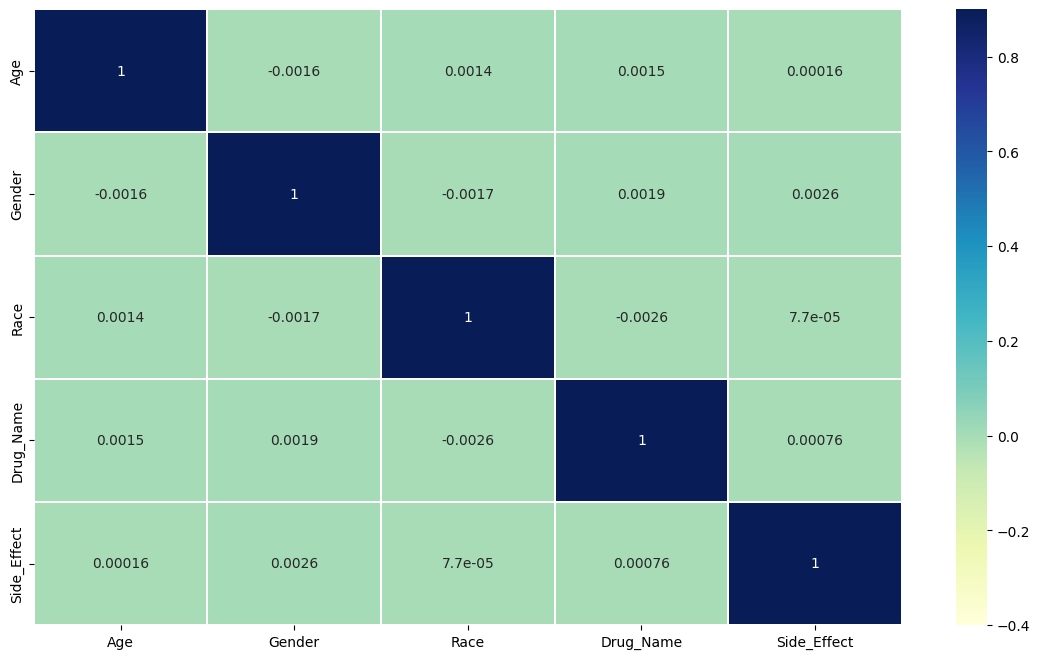

In [39]:
## Plotting a correlation heatmap
corrmatrix = data.corr()
plt.subplots(figsize=(14,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)